In [1]:
import keras 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    RocCurveDisplay,
    PrecisionRecallDisplay,
)

%matplotlib inline
sns.set()

In [2]:
data = pd.read_csv('titanic_data.csv' , sep = '\t')

In [3]:
input_names = ['Age','Sex','Pclass']
output_names = ['Survived']

In [4]:
data
# SibSp - number of brothers/sister/spouce aboard
# Parch - number of parents / children
# Fare - ticket price
# Embarked - port of embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
# remove features with unique values
drop_cols = ['PassengerId','Name','Ticket','Cabin']
data = data.drop(drop_cols,axis=1)

In [6]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,0,3,male,NaN,0,0,8.0500,S
1305,1,1,female,39.0,0,0,108.9000,C
1306,0,3,male,38.5,0,0,7.2500,S
1307,0,3,male,NaN,0,0,8.0500,S


## EDA

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


In [8]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


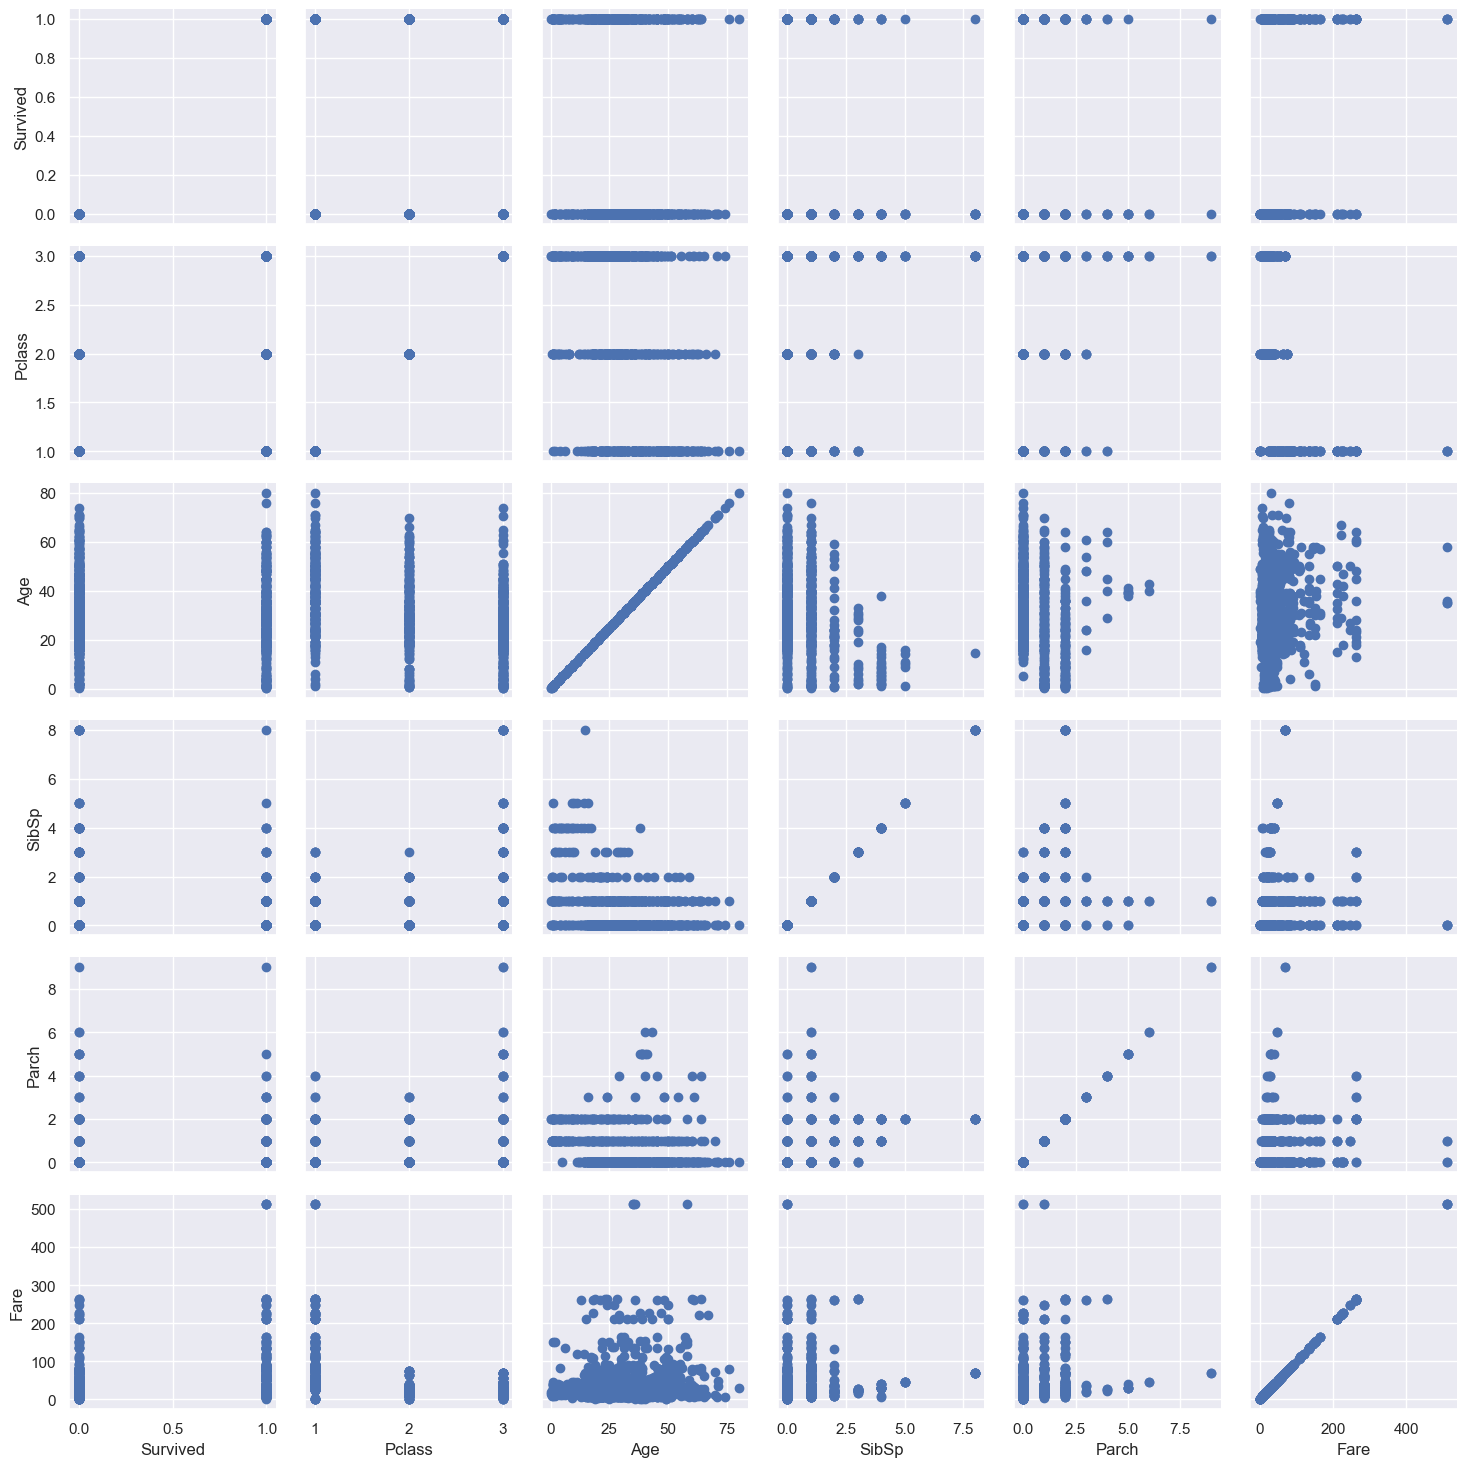

In [9]:
pair_grid_plot = sns.PairGrid(data)
pair_grid_plot.map(plt.scatter)

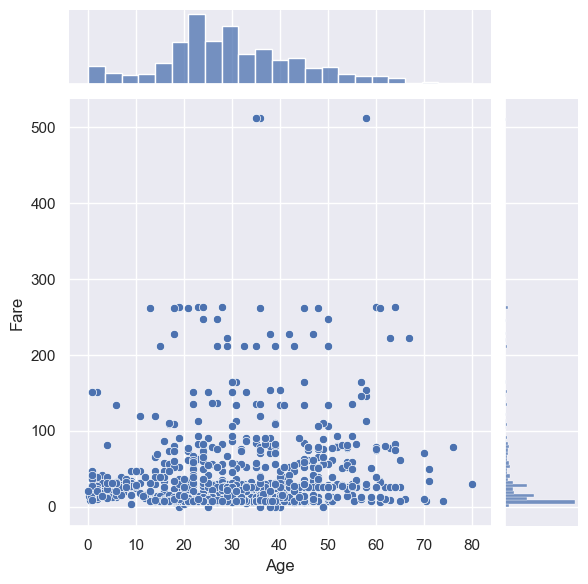

In [10]:
# distribution of age and fare 
sns.jointplot(x = 'Age', y = 'Fare', data = data)

the most frequent price is the cheapest

<Axes: ylabel='Age'>

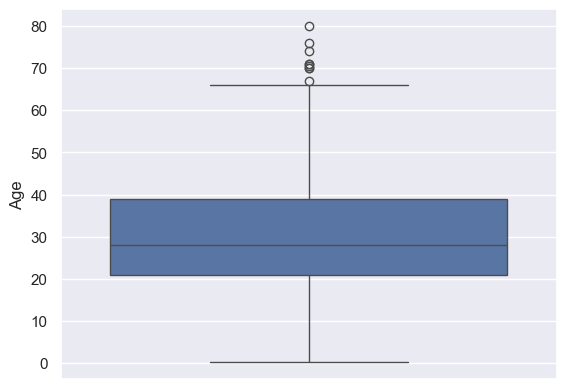

In [11]:
sns.boxplot(data['Age'])

<Axes: xlabel='Survived', ylabel='count'>

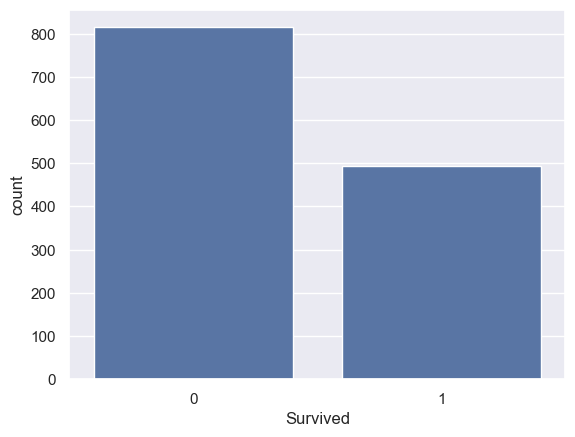

In [12]:
sns.countplot(x = 'Survived', data = data)

In [13]:
# how the gender affects survival?

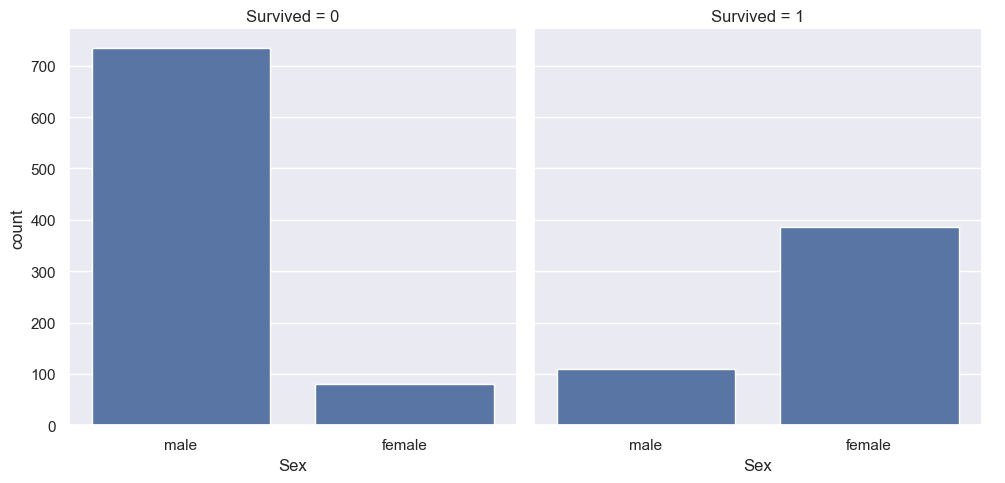

In [14]:
sns.catplot(x = 'Sex', col = 'Survived', kind = 'count', data = data)

the probability of surviving on the Titanic is much higher for a woman than for a man

In [15]:
men = data[data.Sex=='male']
women = data[data.Sex=='female']
print('Probability to survive for man:', men.Survived.sum()/men.Survived.count()*100)
print('Probability to survive for woman:', women.Survived.sum()/women.Survived.count()*100)

Probability to survive for man: 12.930011862396205
Probability to survive for woman: 82.61802575107296


In [16]:
# how the class affects survival

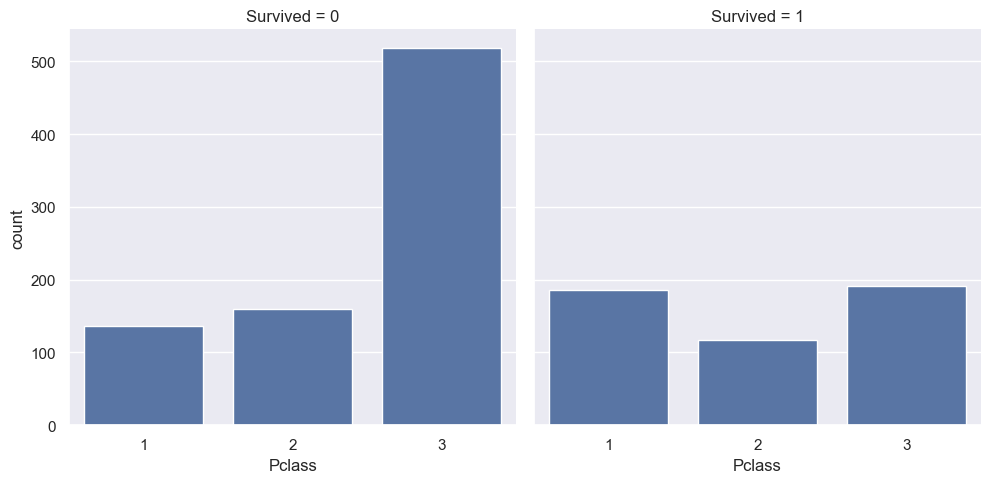

In [17]:
sns.catplot(x = 'Pclass', col = 'Survived', kind = 'count', data = data)

percent of dead people in 3rd class is much higher then in 1st and 2nd

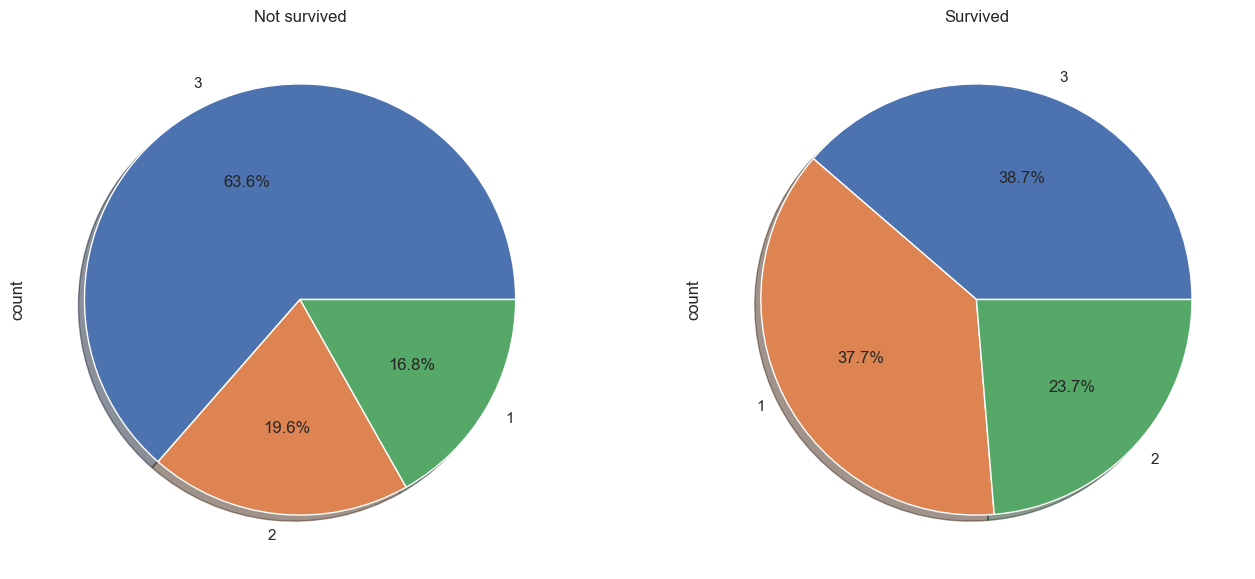

In [18]:
# distribution of survivals by classes
f,ax=plt.subplots(1,2,figsize=(16,7))
data['Pclass'][data['Survived']==0].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
data['Pclass'][data['Survived']==1].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Not survived')
ax[1].set_title('Survived')
plt.show()

In [19]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,137,186,323
2,160,117,277
3,518,191,709
All,815,494,1309


In [20]:
# how the proportion of survivors changed depending on the cabin class

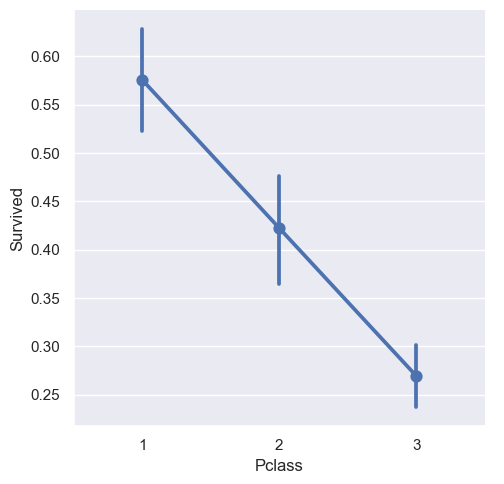

In [21]:
sns.catplot(x='Pclass',y='Survived', kind = 'point', data = data)

In [22]:
# probability to survive in each class
data_1 = data[data.Pclass == 1]
data_2 = data[data.Pclass == 2]
data_3 = data[data.Pclass == 3]
print("% of survivals in") 
print("Pclass=1 : ", data_1.Survived.sum()/data_1.Survived.count())
print("Pclass=2 : ", data_2.Survived.sum()/data_2.Survived.count())
print("Pclass=3 : ", data_3.Survived.sum()/data_3.Survived.count())

% of survivals in
Pclass=1 :  0.5758513931888545
Pclass=2 :  0.4223826714801444
Pclass=3 :  0.2693935119887165


probability to survive in 1st class was the highest

In [23]:
data_1[data_1.Sex=='female'].Survived.sum()/data_1[data_1.Sex=='female'].Survived.count()

0.9791666666666666

probability to survive for woman in 1st class is almost 100%

In [24]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins = True).style.background_gradient(cmap = 'autumn_r')

3rd class men died the most

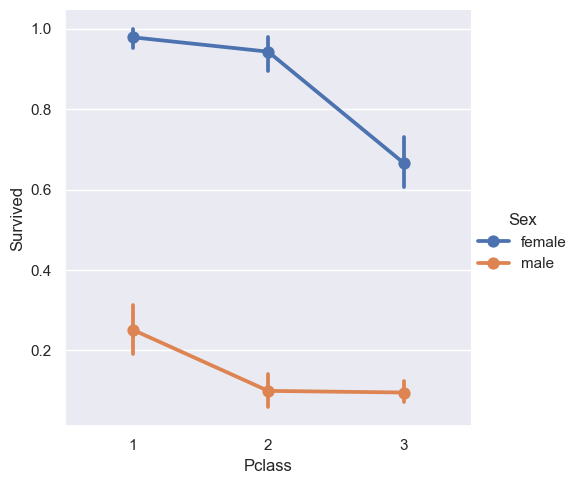

In [25]:
# proportion of survivors depending on the cabin class and sex
sns.catplot(x='Pclass',y='Survived',hue = 'Sex', kind = 'point', data = data)

In [26]:
# add port of embarkation to analysis

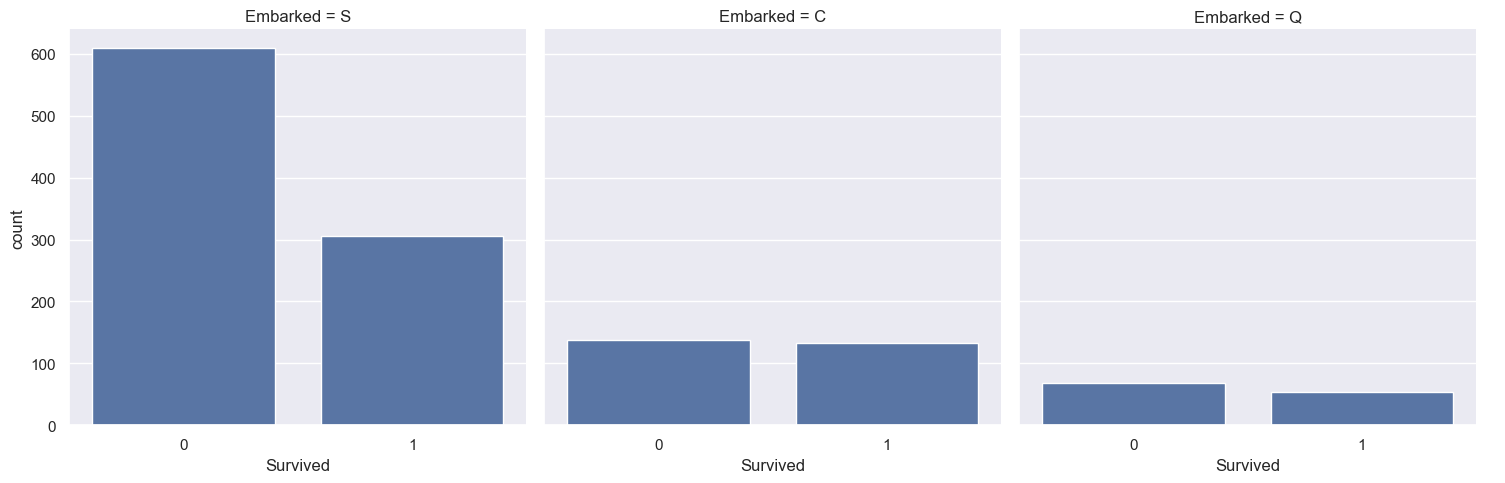

In [27]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=data)

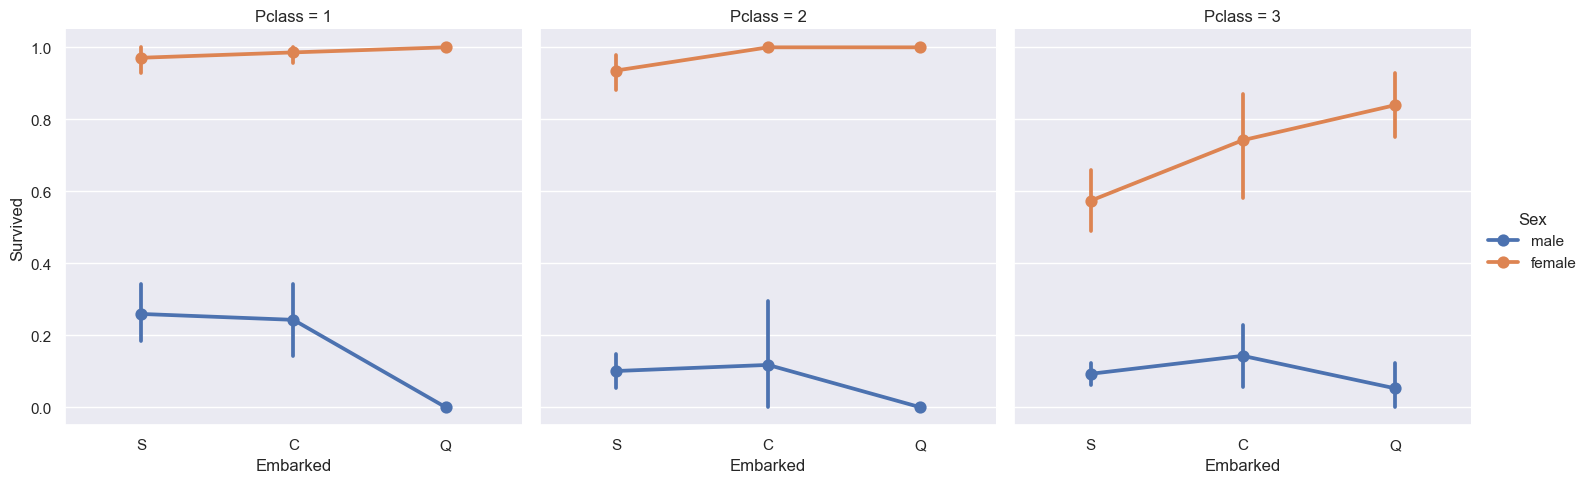

In [28]:
sns.catplot(x='Embarked',y='Survived', col='Pclass', hue= 'Sex', kind='point', data = data)

In [29]:
pd.crosstab([data.Survived], [data.Sex, data.Pclass, data.Embarked], margins=True).style.background_gradient(cmap ='autumn_r')

In [30]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,0,3,male,NaN,0,0,8.0500,S
1305,1,1,female,39.0,0,0,108.9000,C
1306,0,3,male,38.5,0,0,7.2500,S
1307,0,3,male,NaN,0,0,8.0500,S


## non-numerical labels encoding

In [31]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [32]:
data['Embarked'] = data['Embarked'].fillna('none')

In [33]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [34]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

## scaling numerical columns

In [35]:
data['Age'] = data['Age'].fillna(data.Age.mean())

In [36]:
scaler = MinMaxScaler()
data['Age'] = scaler.fit_transform(np.array(data['Age']).reshape(-1,1))
data['Fare'] = scaler.fit_transform(np.array(data['Fare']).reshape(-1,1))

In [37]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.273456,1,0,0.014151,2
1,1,1,0,0.473882,1,0,0.139136,0
2,1,3,0,0.323563,0,0,0.015469,2
3,1,1,0,0.436302,1,0,0.103644,2
4,0,3,1,0.436302,0,0,0.015713,2
...,...,...,...,...,...,...,...,...
1304,0,3,1,0.372180,0,0,0.015713,2
1305,1,1,0,0.486409,0,0,0.212559,0
1306,0,3,1,0.480145,0,0,0.014151,2
1307,0,3,1,0.372180,0,0,0.015713,2


In [38]:
corr = data.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.264710,-0.688371,-0.048483,0.002370,0.108919,0.233622,-0.132420
Pclass,-0.264710,1.000000,0.124617,-0.366371,0.060832,0.018322,-0.558629,0.182154
Sex,-0.688371,0.124617,1.000000,0.057397,-0.109609,-0.213125,-0.185523,0.095215
Age,-0.048483,-0.366371,0.057397,1.000000,-0.190747,-0.130872,0.171893,-0.068091
SibSp,0.002370,0.060832,-0.109609,-0.190747,1.000000,0.373587,0.160238,0.064519
Parch,0.108919,0.018322,-0.213125,-0.130872,0.373587,1.000000,0.221539,0.043835
Fare,0.233622,-0.558629,-0.185523,0.171893,0.160238,0.221539,1.000000,-0.235763
Embarked,-0.132420,0.182154,0.095215,-0.068091,0.064519,0.043835,-0.235763,1.000000


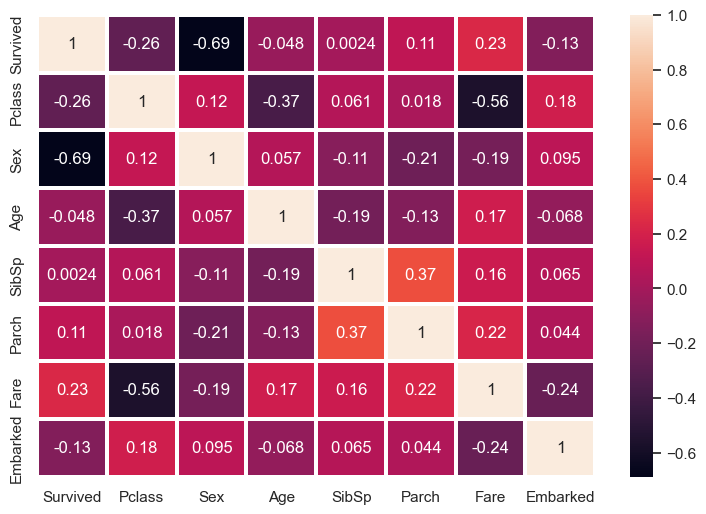

In [39]:
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 ,ax=ax)
plt.show()

### fill empty columns

In [40]:
for col in data.columns:
    sample = data.loc[data[col].isnull(), :]
    if len(sample) != 0:
        print(col)
        print(sample)
        data[col] = data[col].fillna(data[col].mean())
        print('-----')

Fare
      Survived  Pclass  Sex       Age  SibSp  Parch  Fare  Embarked
1043         0       3    1  0.755731      0      0   NaN         2
-----


### Split into features and target

In [41]:
X = data.drop('Survived',axis=1)
y = data['Survived']

In [42]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.273456,1,0,0.014151,2
1,1,0,0.473882,1,0,0.139136,0
2,3,0,0.323563,0,0,0.015469,2
3,1,0,0.436302,1,0,0.103644,2
4,3,1,0.436302,0,0,0.015713,2
...,...,...,...,...,...,...,...
1304,3,1,0.372180,0,0,0.015713,2
1305,1,0,0.486409,0,0,0.212559,0
1306,3,1,0.480145,0,0,0.014151,2
1307,3,1,0.372180,0,0,0.015713,2


### Split into train and test 

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [44]:
X_train.shape, X_test.shape

((1112, 7), (197, 7))

## Model building

### functions for models evaluation

In [45]:
def print_metrics(y_test,y_pred,y_pred_prob):
    print(f"Recall score {recall_score(y_test, y_pred)}")
    print(f"Precision score {precision_score(y_test, y_pred)}")
    print(f"f1 score {f1_score(y_test, y_pred)}")
    print(f"Accuracy score {accuracy_score(y_test, y_pred)}")
    print(f"ROC AUC {roc_auc_score(y_test, y_pred_prob)}")
    print(f"Confusion matrix \n {confusion_matrix(y_test, y_pred)}")
    print(f"Classification report \n{classification_report(y_test, y_pred)}")

In [46]:
def plot_metrics(y_test, y_pred_prob):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    pr_curve = PrecisionRecallDisplay(precision=precision, recall=recall).plot()
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc_curve = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [47]:
def feature_importance(model):
    importances = model.feature_importances_
    indices = np.argsort(importances)
    fig, ax = plt.subplots()
    ax.barh(range(len(importances)), importances[indices])
    ax.set_yticks(range(len(importances)))
    _ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [48]:
def plot_training_losses(fit_results):
    plt.title('Losses train/validation')
    plt.plot(fit_results.history['loss'],label='Train')
    plt.plot(fit_results.history['val_loss'],label='Validation')
    plt.legend()
    plt.show()

### 1. Neural network

In [49]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(7, )))
model.add(keras.layers.Dense(units=20,activation='relu'))
model.add(keras.layers.Dense(units=5,activation='relu'))
model.add(keras.layers.Dense(units=1,activation='sigmoid'))

model.summary()

C:\Users\natal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271 (1.06 KB)

 Trainable params: 271 (1.06 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(loss='mse',optimizer='sgd',metrics=['accuracy', 'precision','recall'])

In [51]:
fit_results = model.fit(x=X_train,y=y_train,epochs=50,validation_split=0.2)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3971 - loss: 0.2640 - precision: 0.3600 - recall: 0.7770 - val_accuracy: 0.4529 - val_loss: 0.2517 - val_precision: 0.3816 - val_recall: 0.6744
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4300 - loss: 0.2559 - precision: 0.3200 - recall: 0.6301 - val_accuracy: 0.5381 - val_loss: 0.2450 - val_precision: 0.4220 - val_recall: 0.5349
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5144 - loss: 0.2467 - precision: 0.3870 - recall: 0.4894 - val_accuracy: 0.5964 - val_loss: 0.2406 - val_precision: 0.4756 - val_recall: 0.4535
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6118 - loss: 0.2399 - precision: 0.4603 - recall: 0.4215 - val_accuracy: 0.6906 - val_loss: 0.2375 - val_precision: 0.8400 - val_recall: 0.2442
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7180 - loss: 0.2339 - precision: 0.8055 - recall: 0.2376 - val_accuracy: 0.6637 - val_loss: 0.2223 - va

In [52]:
y_pred_prob = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [53]:
y_pred = list(map(lambda x : 1 if x>=0.5 else 0, y_pred_prob))

In [54]:
print_metrics(y_test,y_pred,y_pred_prob)

Recall score 0.8488372093023255
Precision score 0.8295454545454546
f1 score 0.8390804597701149
Accuracy score 0.8578680203045685
ROC AUC 0.8767022836790278
Confusion matrix 
 [[96 15]
 [13 73]]
Classification report 
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       111
           1       0.83      0.85      0.84        86

    accuracy                           0.86       197
   macro avg       0.86      0.86      0.86       197
weighted avg       0.86      0.86      0.86       197



C:\Users\natal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


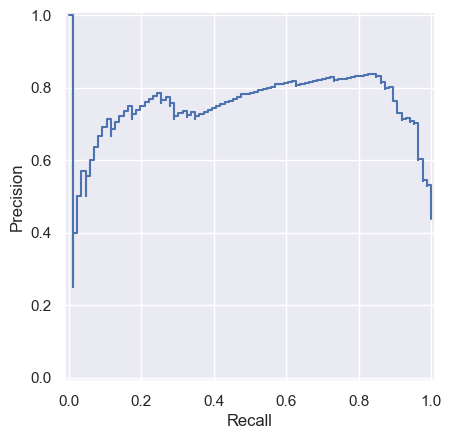

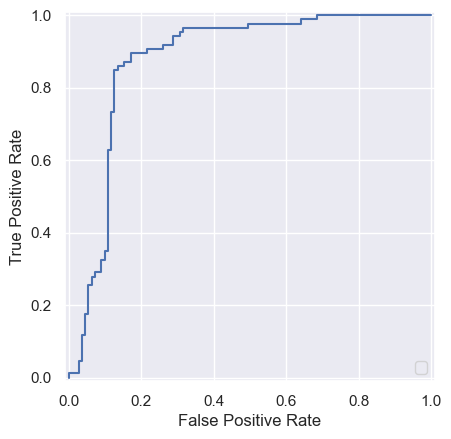

In [55]:
plot_metrics(y_test, y_pred_prob)

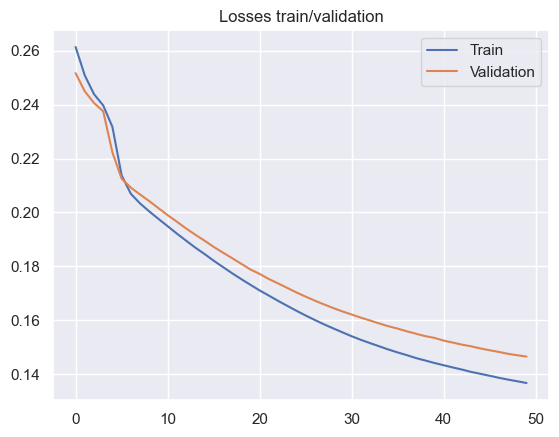

In [56]:
plot_training_losses(fit_results)

### 2. Random forest with hyperparameter tuning

In [57]:
rf = RandomForestClassifier(random_state=0)
distributions = dict(n_estimators=[10,50,100,200, 400],max_depth=[2,5,10, 15])
clf = RandomizedSearchCV(rf, distributions, random_state=0)
search = clf.fit(X_train, y_train)
search.best_params_

{'n_estimators': 200, 'max_depth': 5}

In [58]:
n_estimators = search.best_params_['n_estimators']
max_depth = search.best_params_['max_depth']

In [59]:
model_rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=0)

In [60]:
y_pred_rf = model_rf.predict(X_test)
y_pred_prob_rf = model_rf.predict_proba(X_test)[:,1]

In [61]:
print_metrics(y_test,y_pred_rf,y_pred_prob_rf)

Recall score 0.8604651162790697
Precision score 0.9024390243902439
f1 score 0.8809523809523809
Accuracy score 0.8984771573604061
ROC AUC 0.9370416928556464
Confusion matrix 
 [[103   8]
 [ 12  74]]
Classification report 
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       111
           1       0.90      0.86      0.88        86

    accuracy                           0.90       197
   macro avg       0.90      0.89      0.90       197
weighted avg       0.90      0.90      0.90       197



C:\Users\natal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


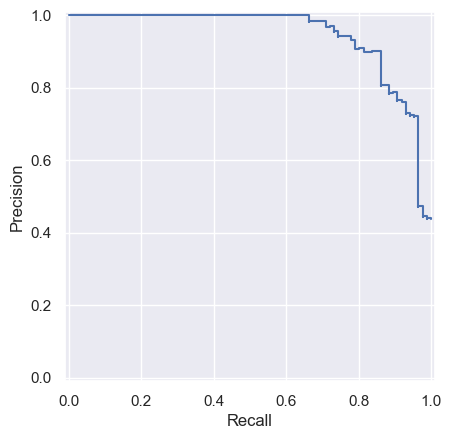

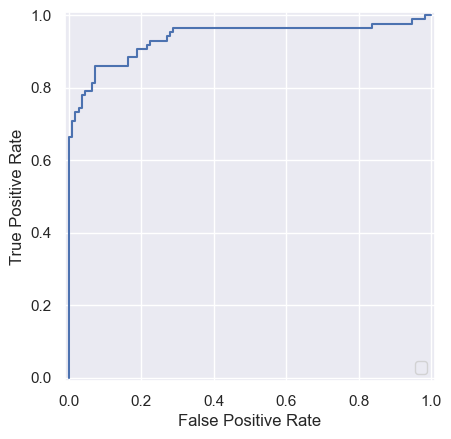

In [62]:
plot_metrics(y_test, y_pred_prob_rf)

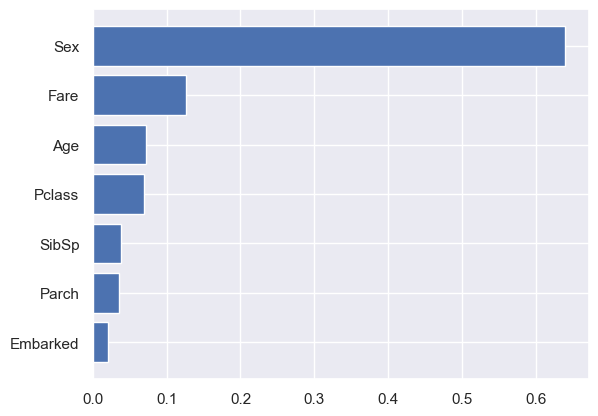

In [63]:
feature_importance(model_rf)

### 3. Logistic regression with hyperparameter tuning

In [64]:
lr = LogisticRegression(solver='saga', tol=1e-2, max_iter=200, random_state=0)
distributions = dict(C=[0.1,0.5,1,2],penalty=['l2', 'l1'])
clf = RandomizedSearchCV(lr, distributions, random_state=0)
search = clf.fit(X_train, y_train)
search.best_params_

C:\Users\natal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'penalty': 'l2', 'C': 2}

In [65]:
penalty = search.best_params_['penalty']
C = search.best_params_['C']

In [66]:
lr_model = LogisticRegression(solver='saga', tol=1e-2, max_iter=200, random_state=0, penalty=penalty, C=C)

In [67]:
lr_model.fit(X_train, y_train)

LogisticRegression(C=2, max_iter=200, random_state=0, solver='saga', tol=0.01)

In [68]:
y_pred_lr = lr_model.predict(X_test)
y_pred_prob_lr = lr_model.predict_proba(X_test)[:,1]

In [69]:
print_metrics(y_test,y_pred_lr,y_pred_prob_lr)

Recall score 0.8604651162790697
Precision score 0.8409090909090909
f1 score 0.8505747126436781
Accuracy score 0.868020304568528
ROC AUC 0.9462602137020741
Confusion matrix 
 [[97 14]
 [12 74]]
Classification report 
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       111
           1       0.84      0.86      0.85        86

    accuracy                           0.87       197
   macro avg       0.87      0.87      0.87       197
weighted avg       0.87      0.87      0.87       197



C:\Users\natal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


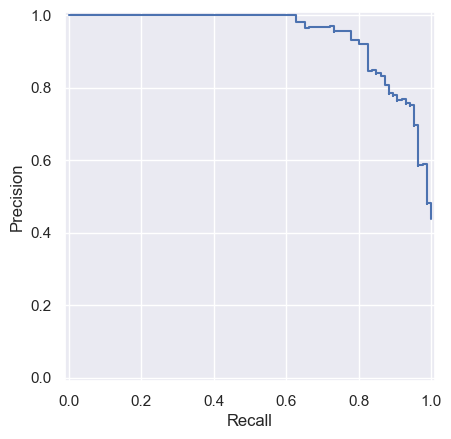

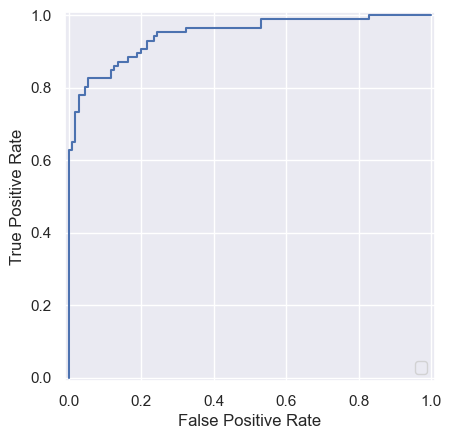

In [70]:
plot_metrics(y_test, y_pred_prob_lr)

The neural network performed the worst in this task. Random forest and logistic regression showed very similar metrics, but random forest labeled class 1 slightly better.